<a href="https://colab.research.google.com/github/AppleYT9/Deep_Learning/blob/main/Deeplearning_newdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Deeplearning

In [3]:
import os #
import shutil #
import random #
import itertools #
%matplotlib inline
import numpy as np #
import tensorflow as tf #
import matplotlib as mpl #
from keras import backend #

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score #
from sklearn.metrics import accuracy_score #
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix #
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [4]:
# Loading data and preprocessing images according to mobilenet requirements
# Creating batches of data

labels = ['Flooding', 'No Flooding']
train_path = '/content/train'
valid_path = '/content/valid'
test_path = '/content/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 14 images belonging to 2 classes.
Found 7 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [5]:
#Loading pre-trained lightweight mobilenet image classifier
mobile = tf.keras.applications.mobilenet.MobileNet()
# mobile.summary()

In [6]:
x = mobile.layers[-6].output

In [7]:
output = Dense(units=2, activation='softmax')(x)

In [8]:
model = Model(inputs=mobile.input, outputs=output)

In [9]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 as the feature extractor
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Fix shape mismatch
    Dense(2, activation='softmax')  # Match 2 classes: 'Flooding' & 'No Flooding'
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary to verify output shapes
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [142]:
# error handling for DENSE

In [144]:
!find . -type d -name ".ipynb_checkpoints"




./valid/Flooding/.ipynb_checkpoints
./valid/No Flooding/.ipynb_checkpoints
./valid/.ipynb_checkpoints
./train/Flooding/.ipynb_checkpoints
./train/No Flooding/.ipynb_checkpoints
./train/.ipynb_checkpoints
./test/Flooding/.ipynb_checkpoints
./test/.ipynb_checkpoints
./evaluate/.ipynb_checkpoints
./.ipynb_checkpoints


In [145]:
!find . -type d -name ".ipynb_checkpoints" -exec rm -rf {} +


In [ ]:
import os
os._exit(00)  # Forces a restart


In [147]:
!rm -rf train/.ipynb_checkpoints valid/.ipynb_checkpoints test/.ipynb_checkpoints train/test/.ipynb_checkpoints


In [11]:
print(train_batches.class_indices)

{'Flooding': 0, 'No Flooding': 1}


In [ ]:
# error handling for DENSE

In [12]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 - 11s - 5s/step - accuracy: 0.3571 - loss: 1.0830 - val_accuracy: 0.7143 - val_loss: 0.9022
Epoch 2/10
2/2 - 3s - 2s/step - accuracy: 0.2857 - loss: 1.0461 - val_accuracy: 0.7143 - val_loss: 0.8797
Epoch 3/10
2/2 - 3s - 1s/step - accuracy: 0.2857 - loss: 1.0083 - val_accuracy: 0.7143 - val_loss: 0.8609
Epoch 4/10
2/2 - 4s - 2s/step - accuracy: 0.2857 - loss: 0.9850 - val_accuracy: 0.7143 - val_loss: 0.8439
Epoch 5/10
2/2 - 2s - 812ms/step - accuracy: 0.2857 - loss: 0.9539 - val_accuracy: 0.7143 - val_loss: 0.8279
Epoch 6/10
2/2 - 2s - 865ms/step - accuracy: 0.2857 - loss: 0.9303 - val_accuracy: 0.7143 - val_loss: 0.8116
Epoch 7/10
2/2 - 2s - 848ms/step - accuracy: 0.2857 - loss: 0.9044 - val_accuracy: 0.7143 - val_loss: 0.7975
Epoch 8/10
2/2 - 3s - 1s/step - accuracy: 0.2857 - loss: 0.8835 - val_accuracy: 0.7143 - val_loss: 0.7835
Epoch 9/10
2/2 - 3s - 2s/step - accuracy: 0.3571 - loss: 0.8632 - val_accuracy: 0.7143 - val_loss: 0.7703
Epoch 10/10
2/2 - 4s - 2s/step - acc

In [13]:
model.save("fine_tuned_flood_detection_model.keras")  # Save in Keras format


In [14]:

test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  1.0
F1 Score:  1.0
Accuracy:  1.0


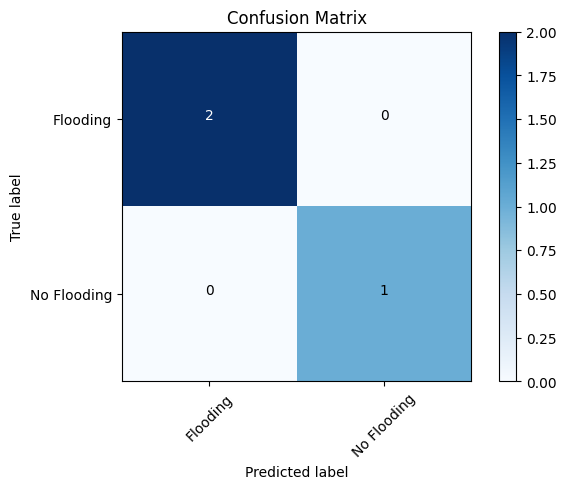

In [16]:
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [17]:
def preprocess_image(file):
    img_path = '/content/evaluate'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

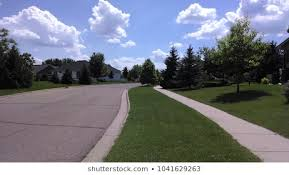

In [29]:
# Display image which we want to predict
from IPython.display import Image
Image(filename='/content/evaluate/3.jpeg', width=300,height=200)

In [30]:
# Preprocess image and make prediction

preprocessed_image = preprocess_image('/3.jpeg')
predictions = model.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [31]:
# Print predicted accuracy scores for both classes, i.e. (1) Flooding, (2) No Flooding
predictions

array([[0.40913752, 0.59086245]], dtype=float32)

In [32]:
result = np.argmax(predictions)

In [33]:
# Print the predicted class label
labels[result]

'No Flooding'

In [ ]:
# get or store data to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful